11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3750/3750 [========================

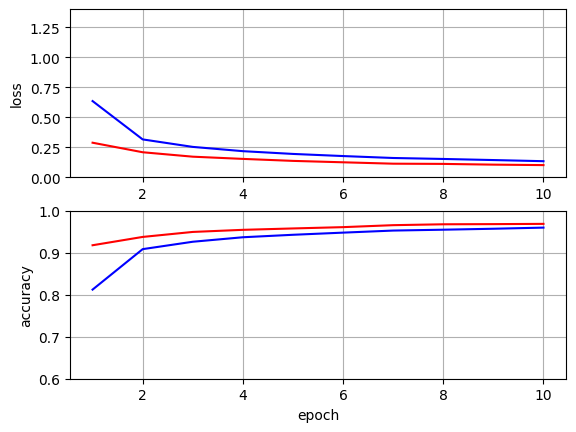

Test loss: 0.10016029328107834
Test accuracy: 0.9686999917030334


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

# from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.optimizers import SGD

import tensorflow as tf

batch_size = 16
num_classes = 10
epochs = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

## convert class vectors to binary class matrices

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
from matplotlib import pyplot as plt
plt.figure()
plt.subplot(2,1,1);
plt.plot(range(1,epochs+1), history.history['loss'], 'b',
         range(1,epochs+1), history.history['val_loss'],'r')
plt.ylabel('loss'); plt.ylim(0,1.4); plt.grid()
plt.subplot(2,1,2);
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b',
         range(1,epochs+1), history.history['val_accuracy'],'r')
plt.ylabel('accuracy'); plt.ylim(0.6,1); plt.grid(); plt.xlabel('epoch')
plt.show()
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 108ms/step


array([[2.04081363e-10, 1.01818564e-07, 1.16735282e-06, 9.99993801e-01,
        6.40820938e-11, 4.31980339e-07, 6.46354918e-14, 2.90580555e-08,
        4.34622325e-06, 8.29381577e-08]], dtype=float32)

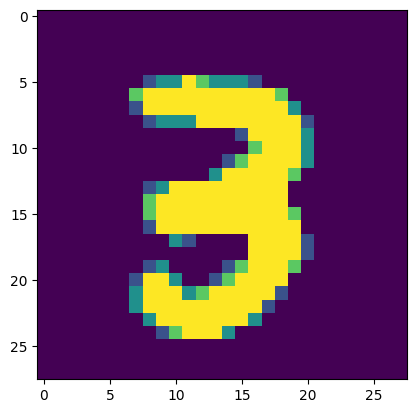

In [ ]:
my_test_id=451
plt.imshow(x_test[my_test_id].reshape(28,28))
#print(x_test[my_test_id].reshape(28,28))
model.predict(x_test[my_test_id].reshape(1,784))

In [ ]:
#Getting the weights of the first layer:
print(model.layers[0].weights)


[<tf.Variable 'dense/kernel:0' shape=(784, 64) dtype=float32, numpy=
array([[-0.07210299, -0.06454231,  0.0009596 , ..., -0.02576822,
        -0.06285352,  0.02933468],
       [-0.03473104, -0.05747657, -0.00736502, ..., -0.08337125,
         0.04358963,  0.00709379],
       [ 0.04033701,  0.04724524, -0.00740124, ..., -0.03692888,
         0.0355663 , -0.06072093],
       ...,
       [ 0.06177653,  0.05959401, -0.03354825, ..., -0.06970304,
         0.01924437,  0.07823626],
       [-0.02165982, -0.02170897,  0.06199291, ...,  0.01350088,
        -0.06612661,  0.00880098],
       [-0.04502784,  0.06510558, -0.05704755, ..., -0.0550436 ,
        -0.03699877,  0.02467305]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
array([-0.08401496, -0.00740751, -0.04937071, -0.09349379,  0.15046571,
        0.18378437, -0.06506346,  0.05861182,  0.10494585, -0.00840954,
        0.07601061,  0.09298357, -0.00224538, -0.0199846 ,  0.07757751,
        0.10758511,  0.

In [ ]:
model.save('my_model.h5')
del model

from keras.models import load_model
model = load_model('my_model.h5')

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.10016029328107834
Test accuracy: 0.9686999917030334


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


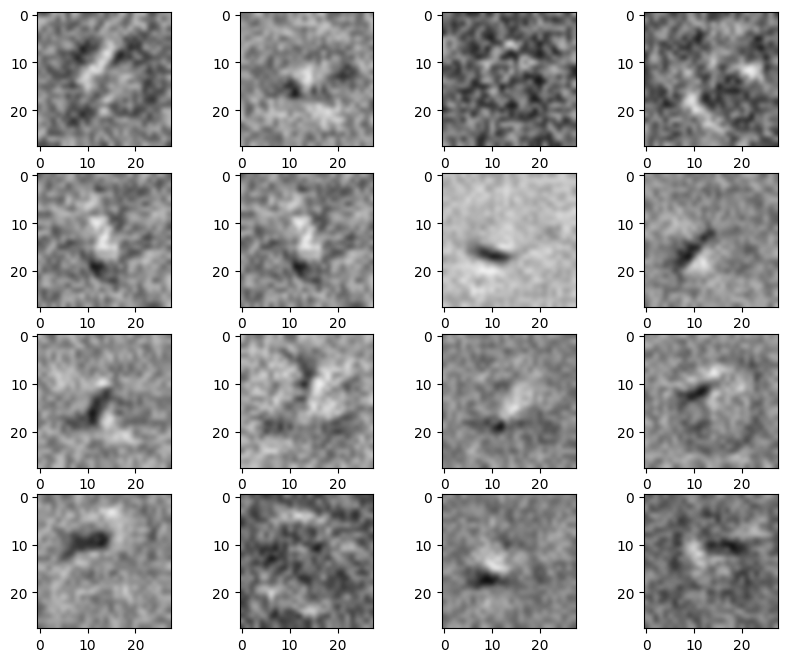

In [ ]:
import numpy as np
plt.figure(figsize=(10, 8), dpi=100)
for i in range(16):
  random=np.random.randint(0, 63, size=1)
  weights=model.layers[0].weights[0][:,random[0]].numpy()
  weights=weights.reshape(28,28)
  plt.subplot(4, 4, i+1)
  plt.imshow(weights,cmap='gray',interpolation='bicubic')